<a href="https://colab.research.google.com/github/pleoncampos1/03MAIR---Algoritmos-de-Optimizacion/blob/main/Modelo_ARIMA_O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo ARIMA para la empresa Realty Income





**Instalación de Librerías**
-------------------------------


In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.5 MB/s eta 0:00:00


**Importación de Librerías**

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import auto_arima


[*********************100%***********************]  1 of 1 completed


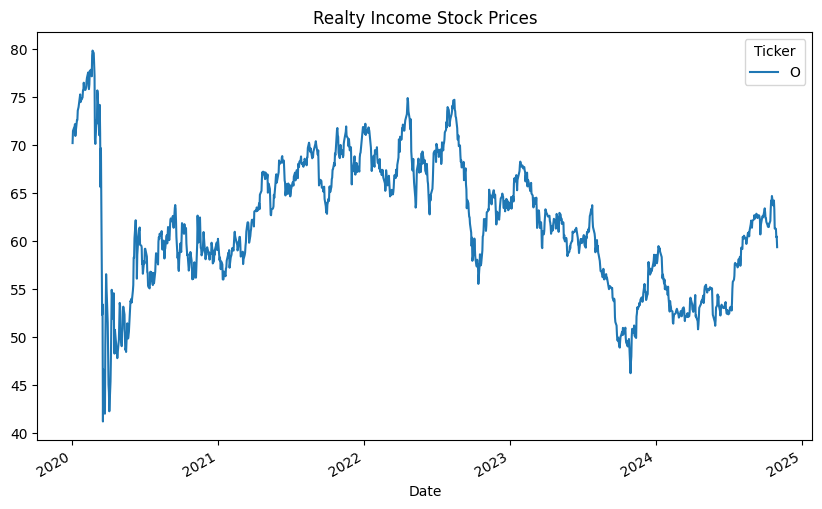

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,O,O,O,O,O,O
Date,,,,,,
2020-01-02,55.426414,70.232559,71.705429,69.699615,71.560081,2061523
2020-01-03,56.428162,71.501938,71.608528,69.874031,69.951553,1826227
2020-01-06,56.711136,71.860466,72.151161,71.046509,71.366280,1324056
2020-01-07,56.726398,71.879845,72.383720,71.065887,72.383720,1610436
2020-01-08,56.986435,72.209305,72.325584,71.627907,71.976746,1912812


In [3]:
#descargar datos de O
data = yf.download('O', start = '2020-01-01', end= '2024-11-01')

#ver solo los precios de cierre(Sin split)
closing_prices = data['Close']
closing_prices.plot(title= 'Realty Income Stock Prices', figsize = (10,6))
plt.show()
data.head()

**Generalidades:** Realty Income es una empresa de inversiones inmobiliarias REIT, la cual se vio afectada por la crisis del covid19. A partir de dicha fecha el precio de la acción comenzó a incrementarse debido a las bajadas de las tasas de interés por parte de la FED. En el gráfico de precios que tenemos líneas arriba se puede observar:

**Volatilidad.** observamos un aumento de volatilidad durante el período 2021-2023, vinculados a las variaciones en las tasas de interés alcistas por parte de la FED para controlar la inflación generada luego de la época de quantitative easing post COVID19, lo que hizo que el precio tuviera una tendencia a la baja pero con mucha volatilidad. Y durante el 2024 se observa una tendencia creciente en el precio debido al inicio de bajadas de tasas de la FED. Podemos concluir que la volatilidad en la acción está altamente correlacionada con las decisiones de la FED.

**Correcciones en el mercado.** Las correcciones en el mercado especialmente en la época del post Covid19 afectaron fuertemente a la acción, pasando a valer casi la mitad del precio, desde $80 a inicios del 2020, época en la cual se dio la crisis post covid, hasta llegar a  un soporte alrededor de US$40, a fines del 2020. A partir de allí corrige al alza hasta $70 en el 1er trimestre del 2022. Estas correcciones están explicadas por:
  1) las decisiones de tasas de interés de la FED, en donde una mayor tasa de interés eleva la dificultad de obtener créditos hipotecarios y los hace más caros debido a que muchos están indexados a tasa flotante USD, por lo que una mayor tasa significa mayores costos para acceder a una vivienda.
  2) Las REITs utilizan fondeo (deuda) para financiar sus proyectos, por lo que una mayor tasa de interés disminuye su rentabilidad.
  3) Atracción por Dividendos: las REITs son atractivas porque pagan altos dividendos, en especial O paga dividendos de manera mensual. Estos dividendos son comparados con las tasas de interés libre de riesgo, por lo que subidas de tasas de interés hace menos atractiva la acción, al ser más seguro el retorno ajustado por riesgo de un bono de estados unidos.
  4) Implicancias Economicas: cuando la FED aumenta las tasas de interés, es altamente probable un aumento en los puestos vacíos de propiedades en renta, lo que hará que los flujos de pago de la acción no puedan ser cumplidos, esto hará que la acción no sea tan atractiva.

**Recuperacion fuerte** Durante todo el 2024 la acción se ha recuperado, desde los mínimos de US$45 para subir en línea con el crecimiento de las acciones de la bolsa americana. Como hemos mencionado anteriormente, esta acción está altamente (inversamente) correlacionada con la tasa de interés de la FED de USA, por lo que al iniciarse el período de bajada de tasas de interés en USA en el 2024, se ha empezado a retomar el alza del precio en la acción.

**Puntos de inflexión** Los puntos de inflección de la acción de realty income se dan en los momentos de decisión de la FED. Especialmente los puntos de soporte está en el nivel de $40, $50, y niveles de resistencia alrededor de $60 y $70 dólares.

**Predicciones futuras** Considerando los escenarios de bajadas de tasas de la FED para los años siguientes dado que el control de la inflación está presente y se busca estimular el crecimiento del empleo, la acción O tendrá un desempeño positivo pues está fuertemente correlacionada con las bajadas de tasas, llegando probablemente a la resistencia de US$70 por acción.



In [4]:
from statsmodels.tsa.stattools import adfuller

#ADF Test para revisar si los datos son estacionarios
#Prueba ADF para la serie original
adf_test = adfuller(closing_prices)
print('La serie Original')
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print()

#prueba para la primera diferencia
adf_test = adfuller(closing_prices.diff().dropna())
print('La primera diferencia')
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print()

#prueba para la segunda diferencia
adf_test = adfuller(closing_prices.diff().diff().dropna())
print('La segunda diferencia')
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print()

La serie Original
ADF Statistic: -3.750835374142492
p-value: 0.003452346271107258

La primera diferencia
ADF Statistic: -8.262154657715657
p-value: 5.049424866677727e-13

La segunda diferencia
ADF Statistic: -11.90971648084624
p-value: 5.332018063080868e-22



Interpretando los resultados
-----------------------------------------------------------------------------
Como sabemos, cuando el valor del test ADF es mayor a 0.05 la serie no es estacionaria. Por ende podemos concluir que la serie original es estacionaria al resultar esta igual a 0.03. Esto puede darse porque al cotizar siempre entre los niveles $40 a $60, se comporta como un random walk, la primera diferencia indica que es estacionaria, la segunda diferencia es estacionaria.
Recordemos que la hipótesis de ADF tiene:

H0: la serie tiene raíz unitaria (serie no estacionaria)
Ha: la serie no tiene raíz unitaria (Serie estacionaria)

POr ende, los 3 ADF indican que la serie no tiene raiz unitaria al tener p-values menores a 0.05.

**ESTIMACION**

Consiste en encontrar el mejor modelo usando rutinas externas llamada pmdarima, el modelo recibe el nombre de auto-arima y es calculado automáticamente.

In [6]:
#Auto ARIMA para encontrar el mejor modelo
stepwise_model = auto_arima(closing_prices, start_p=1, start_q=1,
                            max_p=5, max_q=5, seasonal=False,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3832.266, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3845.681, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3839.983, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3841.804, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3843.751, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3814.919, Time=1.67 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3812.941, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3814.878, Time=1.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3806.998, Time=1.20 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3778.746, Time=1.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3789.473, Time=0.37 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3780.114, Time=1.29 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3776.176, Time=2.38 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3781.457, Time=1.47 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept

In [7]:
# Mostrar el resumen del mejor modelo ARIMA
print(stepwise_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1217
Model:               SARIMAX(4, 1, 4)   Log Likelihood               -1869.219
Date:                Mon, 09 Dec 2024   AIC                           3756.438
Time:                        02:43:45   BIC                           3802.368
Sample:                             0   HQIC                          3773.728
                               - 1217                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0088      0.037      0.241      0.809      -0.063       0.081
ar.L2          0.9331      0.043     21.722      0.000       0.849       1.017
ar.L3         -0.1042      0.041     -2.548      0.0

Los resultados para el modelo ARIMA luego de haber usado el AutoArima para la serie de tiempo de los precios de Realty Income se muestran líneas arriba. La interpretación de los resultados son:

1. Mejor Modelo seleccionado: El mejor modelo ARIMA seleccionado es: ARIMA(4,1,4), sin intercepto. Esto significa que sí hay componentes autorregresivos del 4to orden (AR=4), un componente de diferenciación de primer orden (D=1), hay medias móviles del 4to orden (MA = 4).
Este modelo fue seleccionado con base en el criterio de información de Akaike (AIC), que es 3756.44 para el mejor modelo. Además, se presenta el BIC (Criterio de Información Bayesiano) que es 3802.368.

2. Estimaciones de los parámetros:
 - AR(1): No significativo. el p-value es 0.809, lo cual indica que, al nivel de significancia del 5%, no es estadísticamente significativo (p > 0.05), pero sí lo es al 10%.
 - AR(2): Significativo. el p-value es 0.000 y positivo, indicando una fuerte dependencia con el segundo rezago.
 - AR(3): Significativo. el p-value es 0.011 (p < 0.05) y negativo, relación negativa con el tercer rezago.
 - AR(4): Significataivo. el p-value es 0.000 y negativo, alta influencia del 4to rezago.
 MA: coeficientes de medias móviles, que indican cómo los errores pasados influencian a la serie.
- MA(1): No significativo. el p-value es 0.102, lo cual indica que al nivel de significancia del 5%, no es estadísticamente significativo (p > 0.05).
- MA(2): Significativo. el p-value es 0.000, fuerte influencia negativa del segundo error.
- MA(3): Significativo. el p-value es 0.006.
- MA(4): Significativo. el p-value es 0.000, alta influencia positiva del 4to error.

 sigma2: Varianza del termino del error.
 La varianza residual estimada es 1.2663 con un error estándar de 0.019. El p-valor asociado es altamente significativo (p < 0.000), lo que indica que este parámetro es relevante.

3. Pruebas de diagnóstico:
- Ljung-Box (L1): prueba de independencia de los residuos en el primer rezago
Esta prueba tiene un valor de Q = 0.12 y un p-valor de 0.73. Esto sugiere que no hay autocorrelación significativa en los residuos del modelo, lo que indica que el ajuste es adecuado en cuanto a capturar la estructura temporal de la serie.

- Jarque-Bera (JB): Prueba de normalidad de los residuos
La prueba JB tiene un valor muy alto de 77613.06 y un p-valor de 0.00, lo que sugiere que los residuos no siguen una distribución normal. Esto podría deberse a la presencia de valores extremos o alguna otra irregularidad en los datos.

- Heterocedasticidad (H): Prueba de homocedasticidad
La prueba de heterocedasticidad presenta un valor de 0.17, lo que indica que los residuos presentan varianza no constante. Esto puede ser un problema en la modelización, ya que indica que los errores no son homogéneos, o la varianza de los errores no es constante.

4. Curtosis (Kurt) y Skewness (Asimetría): El valor de la asimetría es -2.96, lo que indica una fuerte asimetría negativa en los residuos. Kurtosis: El valor de la curtosis es 41.69, lo que indica una alta concentración de valores alrededor de la media y la presencia de colas más pesadas que las de una distribución normal, lo que refuerza la falta de normalidad de los residuos.

Interpretación General:
El modelo ARIMA(4,1,4) es un modelo que parece capturar bien las características de la serie, aunque los residuos presentan heterocedasticidad y no son normales. El hecho de que los residuos no sean normales y presenten heterocedasticidad sugiere que podría ser útil investigar otros modelos o realizar transformaciones adicionales para mejorar el ajuste, como modelos GARCH que permitan capturar la volatilidad variable.

Para que sea un buen modelo el AIC, BIC, HQIC, tienen que ser bastante altos. o negativos.
El P > z tiene que ser menor a 0.05 para que sea sinificativo.
El Ljun-Box probabilidad Prob(Q): tiene que ser mayor a 0.05 para que exista ruido blanco.
En este caso sí hay ruido blanco.
Dado que el Prob(H) es menor a 0.05 existe evidencia de heteroscedasticidad en el modelo.
Dado que el prob(JB) es menor a 0.05 no existe evidencia de que los errores del modelo se comporten como una distribución normal.
En el caso del Skew, está muy negativa, cuando debería estar cercana a cero.
En el caso de Kurtosis está muy alta, siendo que debería estar cercana a 3.
El valor está bien lejos de lo normal.


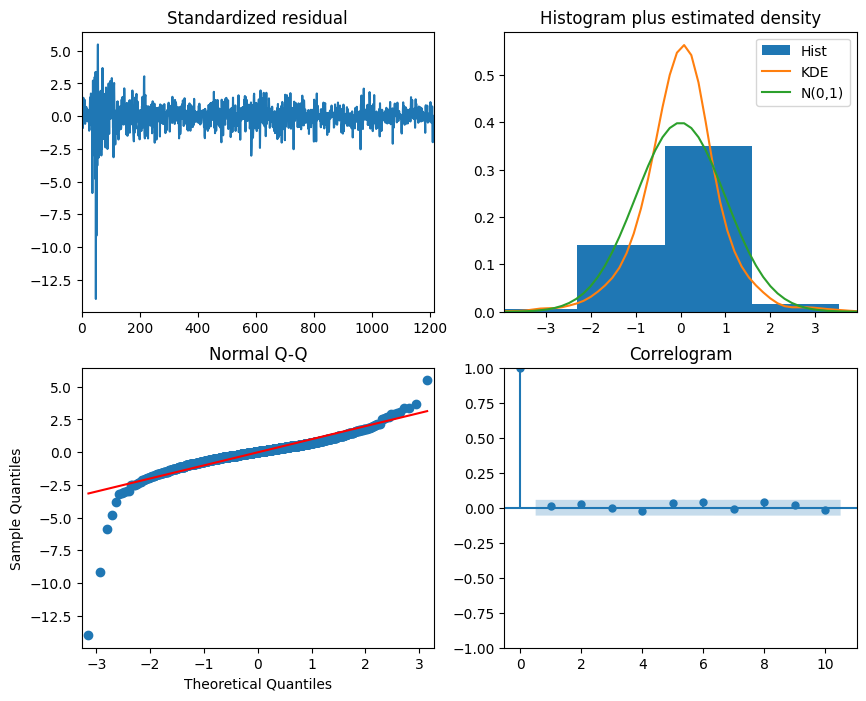

In [9]:
# Chequeo del modelo final autoArimaa, con los mejores parámetros
model = stepwise_model.fit(closing_prices)

# Diagnóstico del modelo: residuos
model.plot_diagnostics(figsize=(10, 8))
plt.show()


Analisis del Gráfico:

1. Standardized Residuals (Residuos estandarizados):
 La mayoría de los residuos están cerca de 0, lo cual es un buen indicativo. Sin embargo, se observan algunos picos bajos, especialmente al inicio, lo que sugiere la presencia de outliers o eventos puntuales que el modelo no ha capturado bien. En general no se observan patrones, lo que indica un buen ajuste en general.

2. Histogram plus estimated density (Histograma más densidad estimada):
 La distribución de los residuos parece acercarse a la normal, pero presenta una ligera asimetría y algunos residuos se desvían hacia la derecha. Esto está en línea con el resultado de la prueba de Jarque-Bera, que sugería que los residuos no siguen una distribución normal perfecta. La curva KDE se ajusta bien a los datos en su mayor parte, pero hay desviaciones, especialmente en las colas, y colas más gruesas que en una normal.

3. Normal Q-Q Plot:
 Los puntos siguen en general la línea roja, lo que indica que los residuos son aproximadamente normales. Sin embargo, en las colas, hay desviaciones importantes, con varios puntos alejados de la línea.
 Esto indica que los residuos no siguen exactamente una distribución normal y que hay presencia de valores extremos. Esto refuerza la idea de que la normalidad no se cumple completamente, con especial atención a los outliers.

4. Correlogram (Correlograma de los residuos):
 Este gráfico muestra la autocorrelación de los residuos a diferentes rezagos. Interpretación: Los rezagos parecen no tener autocorrelación, ya que los puntos están dentro del intervalo de confianza. En general, esto indica que no hay autocorrelación significativa en los residuos, lo que es un buen indicio de que el modelo ha capturado adecuadamente la estructura temporal de los datos.

Resumen General:
- Buen ajuste general:
 El modelo ARIMA parece ajustarse razonablemente bien a los datos, los residuos parecen ser independientes y centrados en 0, lo cual indica que el modelo captura bien la dinámica de la serie.

 -Desviaciones de normalidad:
 Aunque la normalidad no es necesariamente estricta en un modelo ARIMA, hay algunos valores extremos que pueden afectar el ajuste del modelo.

Si bien el correlograma muestra que no hay autocorrelación significativa, lo que es positivo, la presencia de outliers y la no normalidad sugieren que el modelo podría mejorarse, tal vez mediante la inclusión de modelos que manejen mejor la varianza cambiante, como un modelo GARCH para la volatilidad.

In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Descargar datos de O (Realty Income)
data = yf.download('O', start='2020-01-01', end='2024-01-01')
closing_prices = data['Close'].dropna()  # Asegurarse de que no hay valores NaN

[*********************100%***********************]  1 of 1 completed


In [11]:
# Definir el rango de parámetros para el Grid Search
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

ARIMA(0, 0, 0) MSE=68.69295961757439
ARIMA(0, 0, 1) MSE=68.72711481443658
ARIMA(0, 0, 2) MSE=68.7661963367556
ARIMA(0, 1, 0) MSE=50.38580711470696
ARIMA(0, 1, 1) MSE=49.4124214681025
ARIMA(0, 1, 2) MSE=47.527915097033194
ARIMA(1, 0, 0) MSE=69.47141311386764
ARIMA(1, 0, 1) MSE=69.1096772872235
ARIMA(1, 0, 2) MSE=69.15622154474693
ARIMA(1, 1, 0) MSE=49.05638820394866
ARIMA(1, 1, 1) MSE=48.6795753113413
ARIMA(1, 1, 2) MSE=47.828049117822864
ARIMA(2, 0, 0) MSE=69.112276196197
ARIMA(2, 0, 1) MSE=69.0128318159276
ARIMA(2, 0, 2) MSE=69.16692309863441
ARIMA(2, 1, 0) MSE=47.76703988661695
ARIMA(2, 1, 1) MSE=47.75548329740378
ARIMA(2, 1, 2) MSE=48.233703327417324
Best ARIMA(0, 1, 2) MSE=47.527915097033194
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  804
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1372.386
Date:                Mon, 09 Dec 2024   AIC               

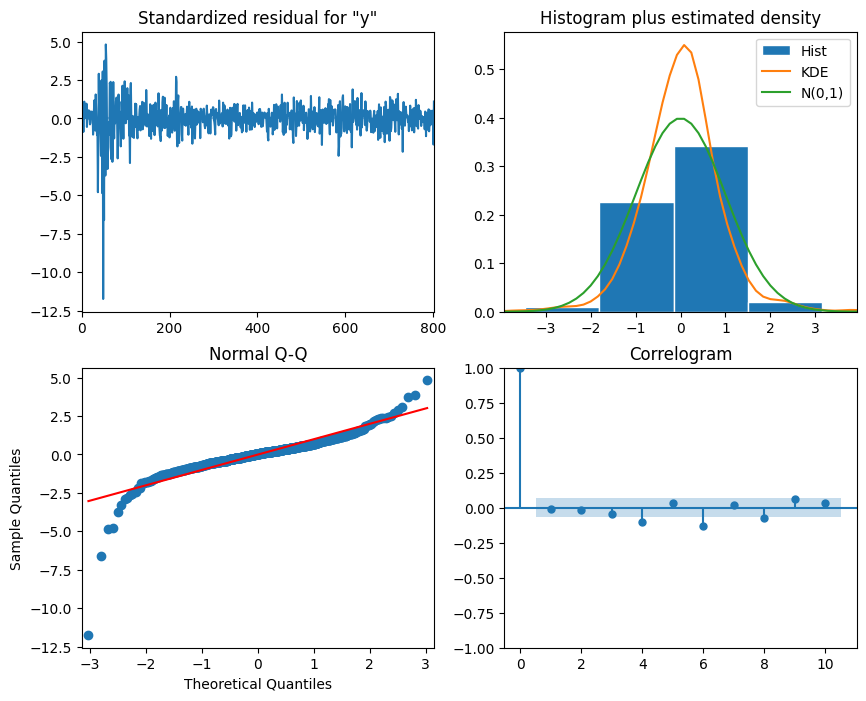

In [12]:
# Función para evaluar un modelo ARIMA con una combinación específica de (p, d, q)
def evaluate_arima_model(X, arima_order):
    # Dividir los datos en entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    train, test = X[0:train_size], X[train_size:]

    # Ajustar el modelo ARIMA
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()

    # Hacer predicciones
    forecast = model_fit.forecast(steps=len(test))

    # Calcular el error del modelo
    error = mean_squared_error(test, forecast)

    return error, model_fit

# Función para realizar Grid Search sobre los valores de p, d, q
def grid_search_arima(X, p_values, d_values, q_values):
    best_score, best_cfg, best_model = float("inf"), None, None

    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    order = (p, d, q)
                    mse, model_fit = evaluate_arima_model(X, order)
                    if mse < best_score:
                        best_score, best_cfg, best_model = mse, order, model_fit
                    print(f'ARIMA{order} MSE={mse}')
                except Exception as e:
                    print(f'Error al ajustar ARIMA{(p, d, q)}: {e}')
                    continue
    if best_model:
        print(f'Best ARIMA{best_cfg} MSE={best_score}')
    else:
        print('No se encontró un modelo ARIMA válido.')
    return best_model

# Ejecutar el Grid Search y obtener el mejor modelo
best_model = grid_search_arima(closing_prices.values, p_values, d_values, q_values)

# Mostrar el diagnóstico del mejor modelo, si existe
if best_model:
    print(best_model.summary())

    # Gráficos de diagnóstico del modelo ajustado
    best_model.plot_diagnostics(figsize=(10, 8))
    plt.show()
else:
    print('No hay un modelo disponible para mostrar el diagnóstico.')

El proceso de Grid Search evaluó múltiples combinaciones de parámetros de autorregresión (AR), diferenciación (D), y medias móviles (MA) para encontrar el mejor ajuste de acuerdo con la métrica MSE (Error Cuadrático Medio) y otros criterios de información.

1. Mejor modelo seleccionado
-------------------------------

El modelo que obtuvo el menor MSE fue el ARIMA(0,1,2), con un MSE de 47.52. Este modelo se basa en un componente de diferenciación de primer orden (D=1) y dos componentes de medias móviles (MA=2), sin componente autorregresivo (AR=0).

2. Estimaciones de los parámetros del modelo
--------------------------------------------

ma.L1: (coeficiente del primer rezago de MA): El coeficiente es -0.0631, con un error estándar de 0.019. El valor Z es -3.276 y el p-value asociado es 0.001, lo cual indica que este parámetro es estadísticamente significativo al nivel de significancia del 5%.

ma.L2: (coeficiente del segundo rezago de MA): El coeficiente es 0.2199, con un error estándar de 0.014. El valor Z es 16.157, y el p-valor es 0.000, lo que indica que este coeficiente sí es estadísticamente significativo (p < 0.05).

sigma2: (varianza residual): El valor de la varianza residual estimada es 1.7863, con un error estándar de 0.036, lo cual es significativo con un p-value = 0.000.

3. Criterios de información
---------------------------

El AIC (Criterio de Información de Akaike) es 2750.77, lo cual indica un buen ajuste en comparación con otros modelos.

El BIC (Criterio de Información Bayesiano) es 2764.837. Aunque es ligeramente mayor que el AIC, este valor sigue siendo bajo, lo que sugiere un buen equilibrio entre la complejidad del modelo y su ajuste a los datos.

El HQIC (Criterio de Información Hannan-Quinn) es  2756.174, que también refleja una buena calidad del modelo.

4. Pruebas de diagnóstico Ljung-Box (L1): El valor de Q es 0.12 con un p-valor de 0.73, lo que sugiere que no hay autocorrelación significativa en los residuos del modelo, un buen indicativo de que el modelo ha capturado la estructura temporal de los datos.

Jarque-Bera (JB): El valor de la prueba es 26281.53 con un p-valor de 0.00, lo que indica que los residuos no siguen una distribución normal.

Heterocedasticidad (H): El valor de la prueba es  0.23, lo que indica que hay heterocedasticidad en los residuos, es decir, varianza no constante, como ya se sugirió en análisis previos.

Skewness y Kurtosis: La asimetría (Skew) es baja (-2.38), pero la curtosis es elevada (30.62), lo que indica colas más pesadas que las de una distribución normal.

Interpretación General: El modelo ARIMA(0,1,2) ha sido seleccionado como el mejor en términos de MSE y ajusta bien los datos, especialmente considerando el valor bajo del AIC.

Los coeficientes de las medias móviles indican que tanto el primer como el segundo término es estadísticamente significativo.

Los residuos presentan algunos problemas con la normalidad y la heterocedasticidad, lo que sugiere que el modelo podría mejorarse si se toman en cuenta estos aspectos, por ejemplo, utilizando modelos que manejen la varianza cambiante (como GARCH).

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2750.695, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2786.200, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2780.877, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2782.750, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2784.237, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2753.168, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2761.419, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2736.230, Time=1.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2755.616, Time=2.63 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2729.521, Time=1.97 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2732.576, Time=0.80 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2731.483, Time=1.27 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2731.436, Time=1.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2738.124, Time=2.02 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

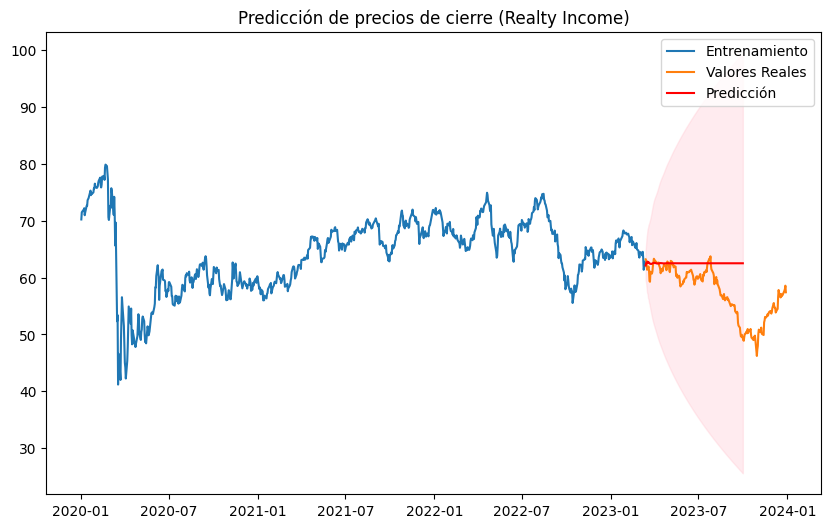

Mean Squared Error (MSE) de la predicción: 47.546600866763455


In [14]:
import yfinance as yf
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import pandas as pd
from sklearn.metrics import mean_squared_error

# Descargar datos de O (O)
#data = yf.download('O', start='2020-01-01', end='2024-01-01')
#closing_prices = data['Close'].dropna()  # Asegurarse de que no haya valores nulos

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Entrenar el modelo auto_arima
model = auto_arima(train, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)

# Mostrar el resumen del modelo
print(model.summary())

# Hacer predicciones para el conjunto de prueba
n_periods = len(test)
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Crear un DataFrame para las predicciones y los datos reales
forecast_index = pd.date_range(start=test.index[0], periods=n_periods, freq='D')
forecast_df = pd.DataFrame({'Predicción': forecast, 'CI Inferior': conf_int[:, 0], 'CI Superior': conf_int[:, 1]}, index=forecast_index)

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valores Reales')
plt.plot(forecast_index, forecast, label='Predicción', color='r')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Predicción de precios de cierre (Realty Income)')
plt.legend()
plt.show()

# Calcular el error de predicción
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error (MSE) de la predicción: {mse}')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2750.695, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2786.200, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2780.877, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2782.750, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2784.237, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2753.168, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2761.419, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2736.230, Time=1.21 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2755.616, Time=0.81 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=2729.521, Time=1.04 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2732.576, Time=0.82 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=2731.483, Time=1.25 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=2731.436, Time=1.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2738.124, Time=2.02 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept

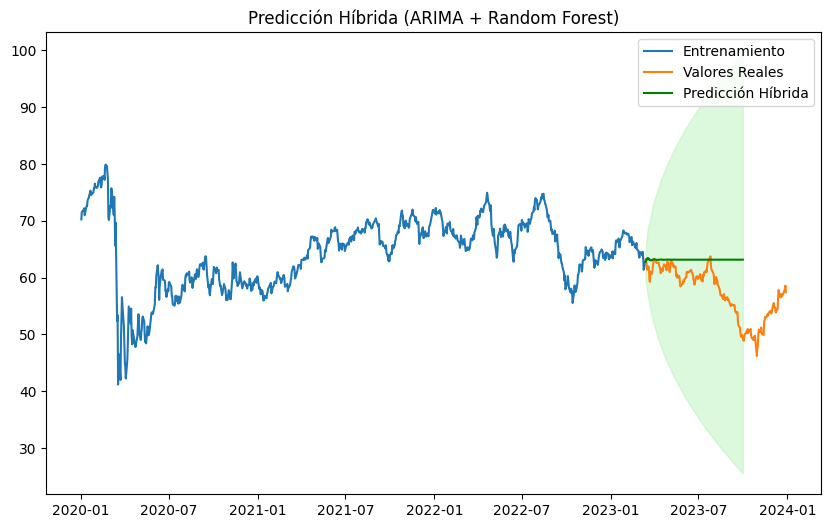

Mean Squared Error (MSE) del modelo híbrido: 54.55610343487808


In [15]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Entrenar ARIMA
model_arima = auto_arima(train, seasonal=False, trace=True, stepwise=True, suppress_warnings=True)
model_arima.fit(train)

# Obtener los residuos del modelo ARIMA
residuals = model_arima.resid()

# Crear el conjunto de datos para Random Forest (X: índices de tiempo, y: residuos)
X_rf = np.arange(len(residuals)).reshape(-1, 1)
y_rf = residuals

# Entrenar el modelo Random Forest con los residuos de ARIMA
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_rf, y_rf)

# Predicciones ARIMA
forecast_arima, conf_int = model_arima.predict(n_periods=n_periods, return_conf_int=True)

# Predicciones Random Forest sobre el período de prueba
X_test_rf = np.arange(len(residuals), len(residuals) + n_periods).reshape(-1, 1)
forecast_rf = rf_model.predict(X_test_rf)

# Sumar las predicciones de ARIMA y Random Forest (modelo híbrido)
forecast_hybrid = forecast_arima + forecast_rf

# Crear DataFrame para comparar las predicciones con los datos reales
forecast_hybrid_df = pd.DataFrame({'Predicción Híbrida': forecast_hybrid}, index=forecast_index)

# Gráfico de predicción híbrida vs valores reales
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Valores Reales')
plt.plot(forecast_index, forecast_hybrid, label='Predicción Híbrida', color='g')
plt.fill_between(forecast_index, conf_int[:, 0], conf_int[:, 1], color='lightgreen', alpha=0.3)
plt.title('Predicción Híbrida (ARIMA + Random Forest)')
plt.legend()
plt.show()

# Calcular el error de la predicción híbrida
mse_hybrid = mean_squared_error(test, forecast_hybrid)
print(f'Mean Squared Error (MSE) del modelo híbrido: {mse_hybrid}')


El gráfico muestra la predicción híbrida de los precios de las acciones de Realty Income utilizando una combinación de dos métodos: ARIMA y Random Forest:

1. Sección de entrenamiento (línea azul)
----------------------------------------

La línea azul muestra los precios históricos de las acciones de Realty Income, los cuales se utilizaron para entrenar los modelos. Desde 2020 hasta inicios de 2023, se observa una tendencia lateral, con algunas tendencias hacia la baja. Estos datos sirven como base para el entrenamiento tanto del modelo ARIMA como del modelo Random Forest.

2. Valores reales (línea naranja):
----------------------------------
 La línea naranja refleja los valores reales (observados) para el periodo posterior al entrenamiento, desde aproximadamente 2023. Esta parte del gráfico representa la evolución real de los precios de las acciones de O después de que el modelo fue entrenado, lo que sirve para evaluar la precisión del modelo.

3. Predicción híbrida (línea verde)
-----------------------------------

La línea verde es la predicción híbrida generada mediante la combinación de los modelos ARIMA y Random Forest.

Interpretación: La predicción se muestra extendida hacia el futuro (2024), con un intervalo sombreado en verde que representa la incertidumbre o el rango de confianza de la predicción. El modelo predice una continuación de la tendencia lateral de los precios, lo cual está en línea con el comportamiento reciente de los valores reales. Esto sugiere que el modelo híbrido espera que los precios de las acciones de O Se mantengan en el soporte o alrededor del precio actual en el corto plazo, aunque también reconoce que puede haber cierta variabilidad (reflejada en el área sombreada).

4. Rango de predicción (área sombreada en verde):
------------------------------------------------
 El área sombreada en verde alrededor de la predicción indica el intervalo de confianza o la incertidumbre asociada con la predicción del modelo. Este intervalo es más amplio a medida que se proyecta más lejos en el tiempo, lo cual es natural, ya que la incertidumbre sobre los precios futuros aumenta con el tiempo. Este rango también sugiere que, aunque la tendencia central es lateral, los precios de las acciones podrían fluctuar dentro de un rango relativamente amplio.

5. Error Cuadrático Medio (MSE) del modelo híbrido:
---------------------------------------------------

En la parte inferior del gráfico se muestra el MSE (Error Cuadrático Medio) del modelo híbrido, que es  54.5561. Este valor cuantifica el error promedio entre los valores predichos por el modelo y los valores reales observados. Un MSE relativamente bajo, como el que se muestra, indica que el modelo tiene un buen ajuste y que las predicciones generadas están razonablemente cerca de los valores reales. Sin embargo, siempre se debe tener en cuenta que el MSE no captura todas las dinámicas de error, y las fluctuaciones futuras podrían ser más amplias de lo que el modelo predice.

Conclusión: El gráfico muestra que el modelo híbrido ARIMA + Random Forest está prediciendo una lateralización de los precios de las acciones de O para 2024, con un margen de incertidumbre representado por el área sombreada. La predicción parece bastante consistente con los datos reales recientes (línea naranja), aunque el intervalo de confianza sugiere que podrían ocurrir fluctuaciones dentro de un rango, lo que se observa en la caída del precio a medida que el tiempo va pasando y se sale del rango de lateralización. El MSE relativamente bajo respalda la precisión del modelo, pero es importante monitorear continuamente cómo se ajustan las predicciones a medida que se obtienen nuevos datos.